## Early Stopping: A Beautiful Free Lunch

### What is Early Stopping?

Early Stopping is a regularization technique that stops the training process as soon as the validation error starts increasing, indicating that the model is beginning to overfit. It's like having a smart coach who tells you to stop practicing when you start getting worse instead of better.

### Why Early Stopping Works?

- Prevents overfitting: Stops training before the model memorizes noise
- Saves time and resources: No need to train for more epochs than necessary
- Automatic regularization: No hyperparameter tuning needed
- Simple yet effective: Works with any iterative learning algorithm


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from copy import deepcopy

In [ ]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(
    X[:50], y[:50].ravel(), test_size=0.5, random_state=10
)

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly_scaler = Pipeline(
    [
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ]
)

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(
    max_iter=1,
    tol=None,  # disable early stopping
    warm_start=True,  # continue training from previous state
    penalty=None,
    learning_rate="constant",
    eta0=0.0005,
    random_state=42,
)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

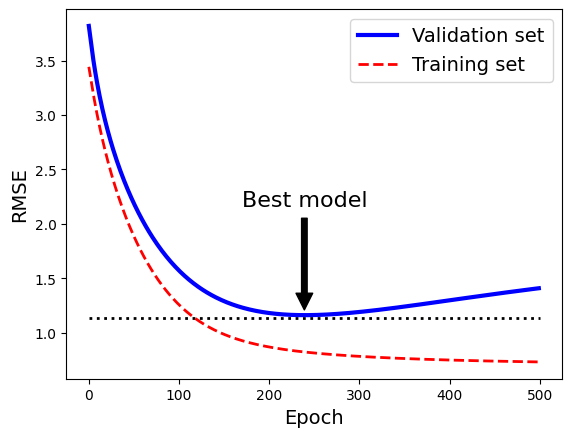

In [11]:
sgd_reg = SGDRegressor(
    max_iter=1,
    tol=None,
    warm_start=True,
    penalty=None,
    learning_rate="constant",
    eta0=0.0005,
    random_state=42,
)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate(
    "Best model",
    xy=(best_epoch, best_val_rmse),
    xytext=(best_epoch, best_val_rmse + 1),
    ha="center",
    arrowprops=dict(facecolor="black", shrink=0.05),
    fontsize=16,
)

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

Why Early Stopping is Important Here?

- Degree 90 polynomial is extremely flexible → huge risk of overfitting.
- Dataset is small → overfitting happens in very few epochs.
- Early stopping prevents the model from fitting noise, improving generalization.
